<a href="https://colab.research.google.com/github/harithmote98/harith_INFO5731_Fall2021/blob/main/In_class_exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (40 points in total, 10/20/2021)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (15 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [55]:
!pip install gensim

In [56]:
!pip install pyLDAvis

In [57]:
# Write your code here
# Import required packages
import numpy as np
import pandas as pd
import logging
import pyLDAvis
import pyLDAvis.gensim_models
import json
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

In [58]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

In [59]:
#importing twwiter dataset
import pandas as pd
df =pd.read_csv(r'/tweets.csv',index_col=0)

df.head()

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials t...
2,@VirginAmerica I didn't today... Must mean I n...
3,@VirginAmerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...


In [60]:
# Convert to array
docs =array(df['text'])


In [ ]:
# Define function for tokenize and lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

In [61]:
def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]
    
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs

In [62]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [63]:
# Perform function on our document
docs = docs_preprocessor(docs)

In [64]:
#Create Biagram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

In [65]:
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [66]:
#Remove rare & common tokens 
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=10, no_above=0.2)
#Create dictionary and corpus required for Topic Modeling
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])

Number of unique tokens: 787
Number of documents: 4999
[[(0, 1), (1, 1), (2, 1)]]


In [83]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [84]:
# Make a index to word dictionary.
temp = dictionary[0]  # only to "load" the dictionary.
id2word = dictionary.id2token

In [85]:
# Print the Keyword in the 20 topics
print(lda_model.print_topics())

[(0, '0.152*"still" + 0.140*"after" + 0.102*"ticket" + 0.086*"where" + 0.073*"getting" + 0.065*"before" + 0.045*"night" + 0.036*"well" + 0.035*"nice" + 0.033*"last_night"'), (1, '0.330*"what" + 0.138*"year" + 0.131*"could" + 0.090*"dallas" + 0.081*"start" + 0.073*"think" + 0.044*"reason" + 0.024*"leaving" + 0.024*"know_what" + 0.007*"hawaii"'), (2, '0.103*"much" + 0.098*"change" + 0.087*"online" + 0.085*"best" + 0.071*"some" + 0.061*"done" + 0.056*"card" + 0.049*"reservation" + 0.048*"credit" + 0.042*"without"'), (3, '0.266*"time" + 0.131*"flying" + 0.100*"last" + 0.088*"bag" + 0.050*"week" + 0.047*"last_week" + 0.040*"every" + 0.040*"experience" + 0.039*"awesome" + 0.023*"morning"'), (4, '0.442*"thanks" + 0.121*"minute" + 0.104*"even" + 0.095*"take" + 0.062*"already" + 0.044*"show" + 0.040*"supposed" + 0.036*"haven" + 0.015*"such" + 0.000*"companion_pas"'), (5, '0.227*"just" + 0.202*"late_flight" + 0.125*"late" + 0.076*"travel" + 0.075*"hold" + 0.068*"here" + 0.062*"baggage" + 0.043*"

In [86]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4259450779036367


In [87]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -12.620903852328603


In [88]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [93]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=2, limit=40, step=6)

In [94]:
model_list, coherence_values

([<gensim.models.ldamodel.LdaModel at 0x7ff08854df50>,
 [0.12958317472014544,
  0.2829712599314546,
  0.2679731338545657,
  0.2725247132844058,
  0.3040885679837169,
  0.3306317125273576,
  0.34256220282911737])

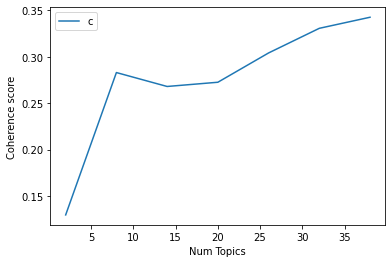

In [95]:
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

## (2) (15 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [97]:
# Write your code here
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt





In [98]:
import pandas as pd
df =pd.read_csv(r'/tweets.csv',index_col=0)

df.head()

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials t...
2,@VirginAmerica I didn't today... Must mean I n...
3,@VirginAmerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...


In [99]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles
docs_list,titles=load_data(r'','/tweets.csv')

Total Number of Documents: 5074


In [100]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    print(df.text)
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        i=str(i)
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts
texts=preprocess_data(docs_list)

0                     @VirginAmerica What @dhepburn said.
1       @VirginAmerica plus you've added commercials t...
2       @VirginAmerica I didn't today... Must mean I n...
3       @VirginAmerica it's really aggressive to blast...
4       @VirginAmerica and it's a really big bad thing...
                              ...                        
4994    @SouthwestAir    Promotion e-mail today (Vegas...
4995                 @SouthwestAir safety back in Dallas!
4996    @SouthwestAir No like I said I could not reach...
4997    @SouthwestAir you guys are so amazing for send...
4998    @SouthwestAir BTW, not a weather delay. We've ...
Name: text, Length: 4999, dtype: object


In [101]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix
dictionary,doc_term_matrix=prepare_corpus(texts)


In [102]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel
lsa_model=create_gensim_lsa_model(texts,10,1000)

[(0, '0.850*"unit" + 0.370*"flight" + 0.096*"get" + 0.092*"thank" + 0.087*"delay" + 0.067*"time" + 0.066*"bag" + 0.064*"servic" + 0.064*"hour" + 0.063*"cancel" + 0.058*"custom" + 0.056*"help" + 0.055*"co" + 0.055*"http" + 0.050*"plane" + 0.050*"2" + 0.046*"wait" + 0.042*"gate" + 0.042*"airlin" + 0.040*"amp" + 0.039*"seat" + 0.039*"late" + 0.038*"book" + 0.038*"fli" + 0.036*"one" + 0.036*"still" + 0.035*"need" + 0.035*"day" + 0.035*"would" + 0.035*"miss" + 0.035*"us" + 0.035*"southwestair" + 0.035*"check" + 0.034*"go" + 0.031*"make" + 0.030*"tri" + 0.030*"pleas" + 0.029*"connect" + 0.028*"flightl" + 0.028*"back" + 0.028*"like" + 0.027*"3" + 0.027*"board" + 0.026*"chang" + 0.026*"last" + 0.026*"agent" + 0.025*"ticket" + 0.025*"call" + 0.025*"problem" + 0.024*"got" + 0.024*"never" + 0.024*"1" + 0.023*"today" + 0.023*"virginamerica" + 0.023*"take" + 0.022*"airport" + 0.021*"issu" + 0.020*"know" + 0.020*"u" + 0.020*"lost" + 0.020*"way" + 0.020*"crew" + 0.020*"min" + 0.019*"work" + 0.019*"tr

In [103]:

def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=10, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
model_list,coherence_values=compute_coherence_values(dictionary,doc_term_matrix,texts,12,2,1)

In [104]:
coherence_values

[0.26820935737476564,
 0.26460455853637727,
 0.28051951437613526,
 0.34041369089789175,
 0.2903759655841924,
 0.289056037238944,
 0.30731631791523645,
 0.2840963365271715,
 0.324257439632957,
 0.2837619309092097]

In [105]:
def plot_graph(doc_clean,start,stop,step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start,stop,step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

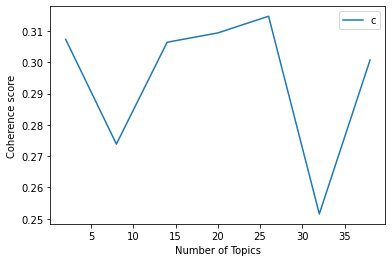

In [106]:
stop=40; start=2; step=6
plot_graph(texts,start,stop,step)

## (3) (10 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)
Latent Semantic Analysis has lower accuracy than Latent Dirichlet allocation has better accuracy.
 Here, The Coherence value for optimal number of topics for LSA is 34 where as for LDA is 42.
  From this we will get to know that Accuracy for LDA is better. LDA has better accuracy that means we can easily generalize LDA model to other new documents.
   LSA has less interpretability among the topics beacuse of dimensionality reduction where as we interpret topic very easily in LDA. I got 14 topics for LDA
  which are highly interpretable than 20 topics of LSA. LSA has less efficient representation.

